In [1]:
import numpy as np
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu, frangi
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import glob

In [2]:
def image_filtering(image):
    gray_image = rgb2gray(image)  # в оттенки серого
    gray_image = frangi(gray_image) # фильтр подходит для фильтрации изображений с сосудами, реками (попробовала на карандашах, получилось)

    return gray_image

def image_binarisation(gray_image):
    coef =  threshold_otsu(gray_image)
    binary = np.zeros(gray_image.shape, dtype=bool)
    binary[gray_image > coef] = True

    return binary

def get_pencil_regions(image):
    image = image_binarisation(image_filtering(image))  # фильтруем и бинаризируем картинку

    pencil_regions = []
    labeled = label(image)
    regions = regionprops(labeled)
    for region in regions:
        if region.axis_minor_length > 4:  # minor - "короткая" сторона фигуры, major - длинная
            if(region.axis_major_length / region.axis_minor_length > 18): # если соотношение длинной стороны к короткой больше 18, то это длинный объект
                pencil_regions.append(region)

    return pencil_regions

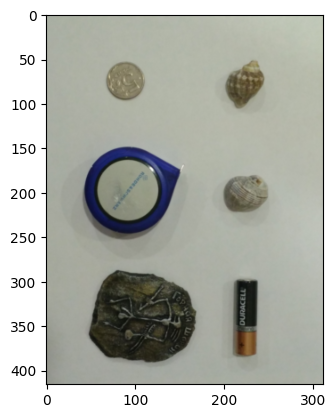

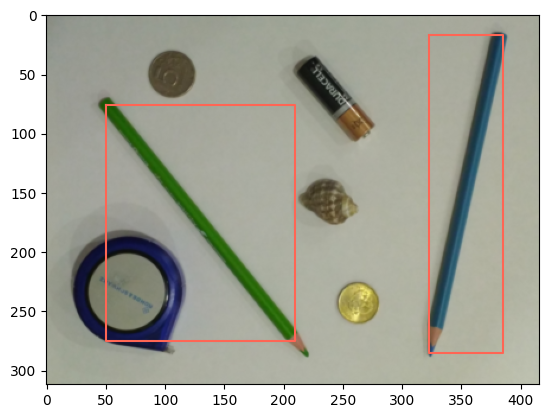

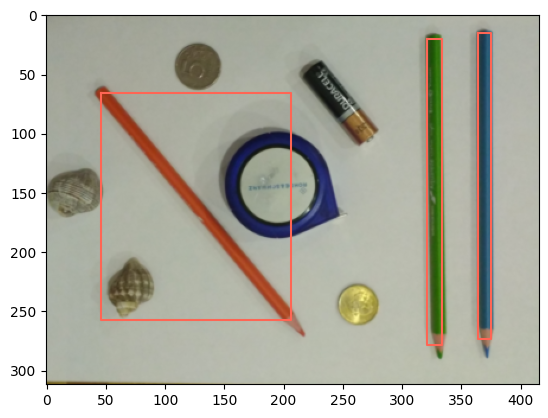

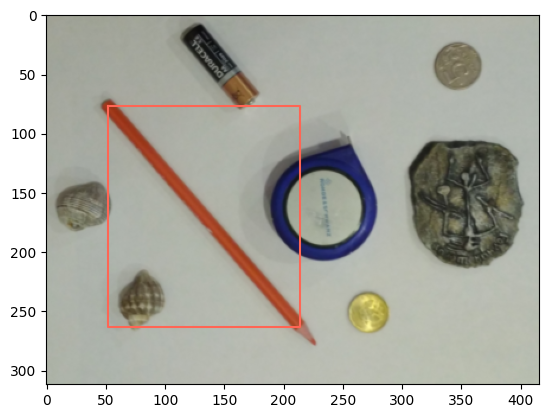

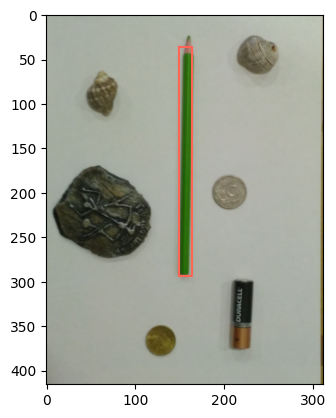

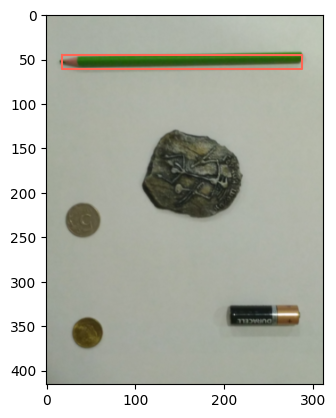

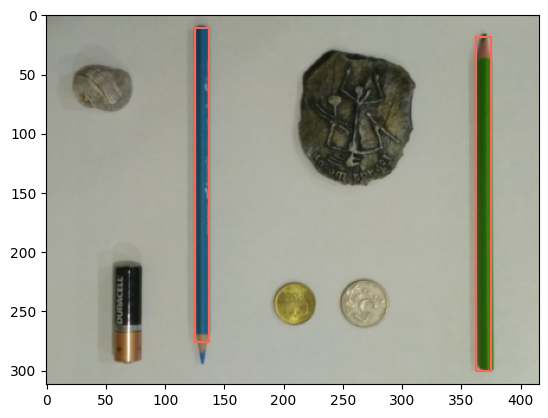

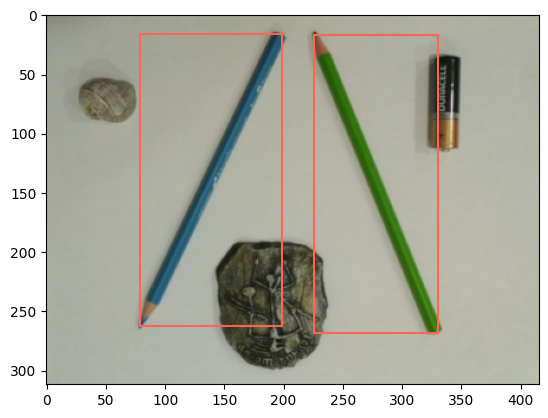

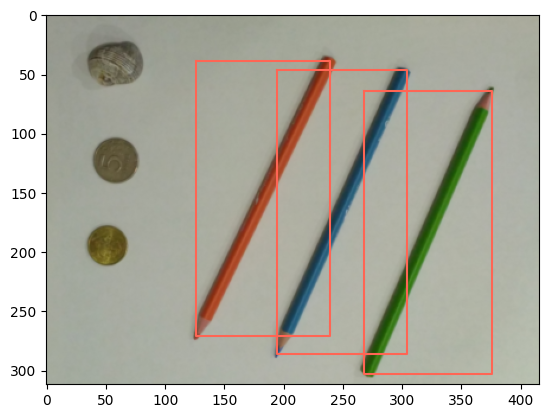

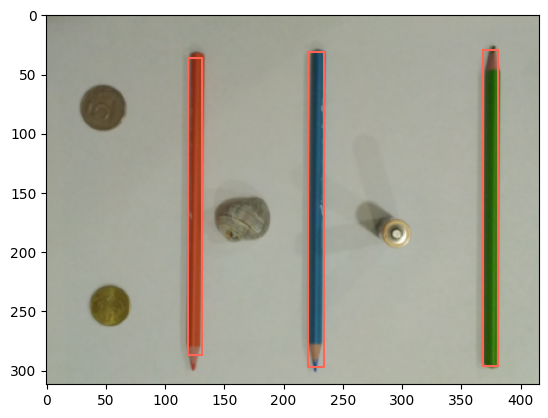

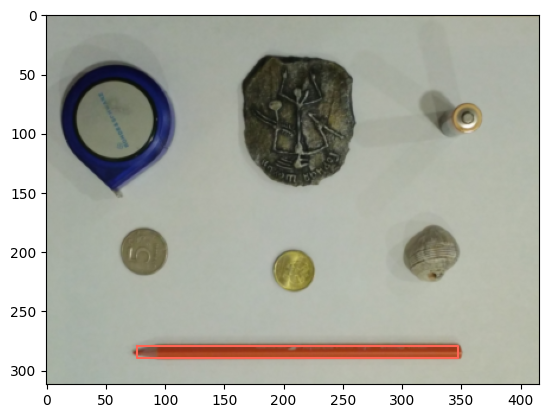

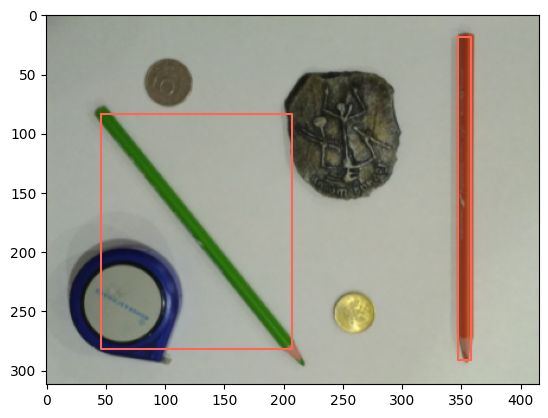

Всего найдено 21 карандашей


In [3]:
img_paths = glob.glob('./images/*')  # использую glob для того, чтобы загрузить несколько картинок

pencil_quantity = 0
for img_path in img_paths:
    image = plt.imread(img_path)
    image = resize(image, (image.shape[0] // 10, image.shape[1] // 10), anti_aliasing=True)  # resize для уменьшения разрешения, чтобы обработка изображения была быстрее
    
    pencil_regions = get_pencil_regions(image)
    pencil_quantity += len(pencil_regions)  # считаем длину массива (с карандашами)

    fig, ax = plt.subplots()
    ax.imshow(image)

    for pencil_reg in pencil_regions:  # выделяем карандаши прямоугольниками))
        minr, minc, maxr, maxc = pencil_reg.bbox 
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)

        ax.plot(bx, by, '#ff6554', linewidth=1.5)  # выводим прямоугольники с цветом и толщиной линии

    plt.show()

print(f"Всего найдено {pencil_quantity} карандашей")